In [10]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [97]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(
    ((Measurement.date >= dt.date(2018, 6, 1)) & (Measurement.date <= dt.date(2018, 6, 30)))
    | ((Measurement.date >= dt.date(2017, 6, 1)) & (Measurement.date <= dt.date(2017, 6, 30))) 
    | ((Measurement.date >= dt.date(2016, 6, 1)) & (Measurement.date <= dt.date(2016, 6, 30)))
    | ((Measurement.date >= dt.date(2015, 6, 1)) & (Measurement.date <= dt.date(2015, 6, 30)))
    | ((Measurement.date >= dt.date(2014, 6, 1)) & (Measurement.date <= dt.date(2014, 6, 30)))
    | ((Measurement.date >= dt.date(2013, 6, 1)) & (Measurement.date <= dt.date(2013, 6, 30)))
    | ((Measurement.date >= dt.date(2012, 6, 1)) & (Measurement.date <= dt.date(2012, 6, 30)))
    | ((Measurement.date >= dt.date(2011, 6, 1)) & (Measurement.date <= dt.date(2011, 6, 30)))
    | ((Measurement.date >= dt.date(2010, 6, 1)) & (Measurement.date <= dt.date(2010, 6, 30)))
           )

# there has GOT to be a better way to do this, but I really couldn't think of anything

In [98]:
#  3. Convert the June temperatures to a list.
june_temps_list = june_temps.all()

In [86]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps_list, columns=['date', 'temperature'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df.sort_index()

In [87]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

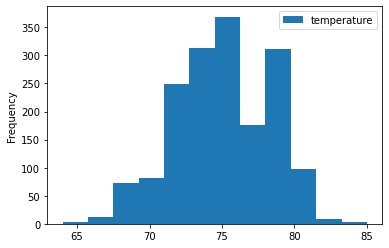

In [94]:
june_df.plot.hist(bins=12)

## D2: Determine the Summary Statistics for December

In [90]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(
    (((Measurement.date >= dt.date(2017, 12, 1)) & (Measurement.date <= dt.date(2017, 12, 31))) 
    | ((Measurement.date >= dt.date(2016, 12, 1)) & (Measurement.date <= dt.date(2016, 12, 31)))
    | ((Measurement.date >= dt.date(2015, 12, 1)) & (Measurement.date <= dt.date(2015, 12, 31)))
    | ((Measurement.date >= dt.date(2014, 12, 1)) & (Measurement.date <= dt.date(2014, 12, 31)))
    | ((Measurement.date >= dt.date(2013, 12, 1)) & (Measurement.date <= dt.date(2013, 12, 31)))
    | ((Measurement.date >= dt.date(2012, 12, 1)) & (Measurement.date <= dt.date(2012, 12, 31)))
    | ((Measurement.date >= dt.date(2011, 12, 1)) & (Measurement.date <= dt.date(2011, 12, 31)))
    | ((Measurement.date >= dt.date(2010, 12, 1)) & (Measurement.date <= dt.date(2010, 12, 31)))
           ))

In [91]:
# 7. Convert the December temperatures to a list.
dec_temps_list = dec_temps.all()

In [92]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps_list, columns=['date', 'temperature'])
dec_df.set_index(dec_df['date'], inplace=True)
dec_df = dec_df.sort_index()

In [93]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

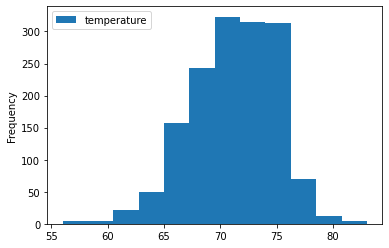

In [95]:
dec_df.plot.hist(bins=12)

In [103]:
# precipitation for June
june_precip = session.query(Measurement.date, Measurement.prcp)\
    .filter(
    ((Measurement.date >= dt.date(2018, 6, 1)) & (Measurement.date <= dt.date(2018, 6, 30)))
    | ((Measurement.date >= dt.date(2017, 6, 1)) & (Measurement.date <= dt.date(2017, 6, 30))) 
    | ((Measurement.date >= dt.date(2016, 6, 1)) & (Measurement.date <= dt.date(2016, 6, 30)))
    | ((Measurement.date >= dt.date(2015, 6, 1)) & (Measurement.date <= dt.date(2015, 6, 30)))
    | ((Measurement.date >= dt.date(2014, 6, 1)) & (Measurement.date <= dt.date(2014, 6, 30)))
    | ((Measurement.date >= dt.date(2013, 6, 1)) & (Measurement.date <= dt.date(2013, 6, 30)))
    | ((Measurement.date >= dt.date(2012, 6, 1)) & (Measurement.date <= dt.date(2012, 6, 30)))
    | ((Measurement.date >= dt.date(2011, 6, 1)) & (Measurement.date <= dt.date(2011, 6, 30)))
    | ((Measurement.date >= dt.date(2010, 6, 1)) & (Measurement.date <= dt.date(2010, 6, 30)))
           ).all()

june_precip_df = pd.DataFrame(june_precip, columns=['date', 'precipitation'])
june_precip_df.set_index(june_precip_df['date'], inplace=True)
june_precip_df = june_precip_df.sort_index()

june_precip_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [105]:
# precipitation for December
dec_precip = session.query(Measurement.date, Measurement.prcp)\
    .filter(
    (((Measurement.date >= dt.date(2017, 12, 1)) & (Measurement.date <= dt.date(2017, 12, 31))) 
    | ((Measurement.date >= dt.date(2016, 12, 1)) & (Measurement.date <= dt.date(2016, 12, 31)))
    | ((Measurement.date >= dt.date(2015, 12, 1)) & (Measurement.date <= dt.date(2015, 12, 31)))
    | ((Measurement.date >= dt.date(2014, 12, 1)) & (Measurement.date <= dt.date(2014, 12, 31)))
    | ((Measurement.date >= dt.date(2013, 12, 1)) & (Measurement.date <= dt.date(2013, 12, 31)))
    | ((Measurement.date >= dt.date(2012, 12, 1)) & (Measurement.date <= dt.date(2012, 12, 31)))
    | ((Measurement.date >= dt.date(2011, 12, 1)) & (Measurement.date <= dt.date(2011, 12, 31)))
    | ((Measurement.date >= dt.date(2010, 12, 1)) & (Measurement.date <= dt.date(2010, 12, 31)))
           )).all()

dec_precip_df = pd.DataFrame(dec_precip, columns=['date', 'precipitation'])
dec_precip_df.set_index(dec_precip_df['date'], inplace=True)
dec_precip_df = dec_precip_df.sort_index()

dec_precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
